Text(0,0.5,'Error Amplitude')

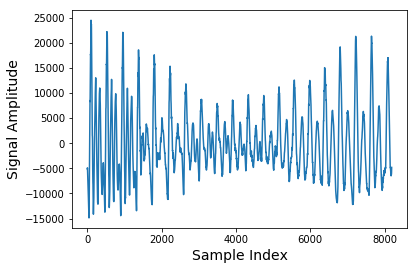

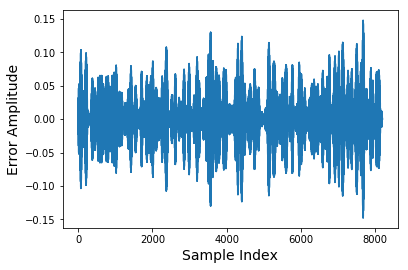

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import dct,idct
import pickle

# Compression Function
def compressor(x,N):
    
    filename = "CompressedFile.pkl"
    file = open(filename, 'wb')
    
    CompressedFile = []
    L = 200 #Zero Bits
    M = N-L #NonZero Bits
    CompressedFile.append(N)
    CompressedFile.append(M)
    
    X_dct = dct(x,norm='ortho',type=2)    

    for k in range (0,M):
        CompressedFile.append(X_dct[k])
    
    pickle.dump(CompressedFile,file)
    file.close()    
    return filename

# DeCompression Function
def decompressor(CompressedFileName):
    
    file = open(CompressedFileName, 'rb')
    data = pickle.load(file)
    file.close()
    
    N = data[0]
    M = data[1]    
    X_dct_m = np.ones((N))
    
    for k in range (0,M):
        X_dct_m[k] = data[k+2]
        
    for k in range (M,N):
        X_dct_m[k] = 0

    x_dct_m = idct(X_dct_m,norm='ortho',type=2)    
    return x_dct_m

# Create Sequence x to be compressed
data = read("Test1.wav")
x_temp = np.array(data[1],dtype = float)
N = 8192
x = x_temp[40000:40000+N,0]
# Plot sequence x
fig,ax = plt.subplots()
ax.plot(x)
ax.set_xlabel('Sample Index',fontsize=14)
ax.set_ylabel('Signal Amplitude',fontsize=14)

#Compression
Cfilename = compressor(x,N)
#Decompression
x_dct_m = decompressor(Cfilename)

# Plot error between Original sequence x and the Decompressed sequence x_dct_m
fig,ax = plt.subplots()
ax.plot(x-x_dct_m)
ax.set_xlabel('Sample Index',fontsize=14)
ax.set_ylabel('Error Amplitude',fontsize=14)